# Cornershop's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Load Datasets and perform 

 # Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
* Loading data
* Creating resources
    * Concat Dia and Hora resources anc check its length
    * Creating day_of_name, day_of_month and pure_time
* Exploratory Data Analysis
    * Hypotheses
    * Univariate Analysis
    


# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables

## Loading Libraries and Packages 

In [1]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
from datetime import (datetime, date)

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls -l ../data/

total 504
-rw-rw-r-- 1 broilo broilo 514550 mai 20 16:56 20220520_corrected_sheet1.csv


## Configurations

In [3]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 12}

sns.set(rc=rc)
sns.set_palette("Set2")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [4]:
PATH_DATA = "../data/"
DATA = "20220520_corrected_sheet1.csv"
DATE = time.strftime("%Y%m%d")

# Loading Datasets
* Creating resources

In [85]:
df = pd.read_csv(PATH_DATA + DATA, sep=',')
print(df.shape)
df

(11128, 5)


,Dia,Hora,Valor,Cartão,CBK
0,2015-05-01,00:01:54,36.54,536518******2108,Não
1,2015-05-01,00:03:46,36.54,536518******2108,Não
2,2015-05-01,00:08:50,69.00,453211******1239,Não
3,2015-05-01,00:27:00,193.43,548827******1705,Não
4,2015-05-01,01:32:46,132.00,531681******9778,Não
...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não
11124,2015-05-30,23:08:47,15.00,439354******5281,Não
11125,2015-05-30,23:15:24,20.00,549167******1648,Não
11126,2015-05-30,23:17:41,70.00,518759******8384,Não


# Creating resources
* Concat Dia and Hora resources anc check its length
* Creating day_of_name, day_of_month and pure_time

## Concat Dia and Hora resources anc check its length
* As and example, the length must correspond: 2015-05-01 00:01:54
* Any entry with length greater or less than 2015-05-01 00:01:54 must be excluded or properly corrected

In [86]:
df['Data'] = df.Dia.astype(str) + ' ' + df.Hora.astype(str)

uniqueDataLen = []
for i in range(len(df.Data)):
    uniqueDataLen.append(len(df.Data[i]))
uniqueDataLen = list(set(uniqueDataLen))
uniqueDataLen

[19, 30]

In [87]:
idx = []
for i in range(len(df.Data)):
    if len(df.Data[i]) > 19 or len(df.Data[i]) < 19:
        idx.append(df[df.Data == df.Data[i]].index.values[0])
    else:
        None
print(f"Problem lines: {idx}")
display(df.iloc[idx])
df.drop(index=idx, axis=0, inplace=True)

Problem lines: [7779]


,Dia,Hora,Valor,Cartão,CBK,Data
7779,2015-05-22,1899-12-30 00:00:00,23.0,498453******6960,Não,2015-05-22 1899-12-30 00:00:00


## Creating day_of_name, day_of_month and pure_time

In [88]:
col1, col2 = 'Dia', 'Hora'

# day_of_week
df['day_of_week'] = list(pd.to_datetime(df[col1], format='%Y-%m-%d').dt.dayofweek)
df['day_name'] = list(pd.to_datetime(df[col1], format='%Y-%m-%d').dt.day_name())#.dayofweek)

# day_of_month
df[[col1+'_Ano', col1+'_Mês', col1+'_Dia']] = df[col1].str.split("-", expand=True)
df.rename(columns={col1+'_Dia':'day_of_month'}, inplace=True)

# pure_time
df[[col2+'_HH', col2+'_MIN', col2+'_SEC']] = df[col2].str.split(":", expand=True)
df['pure_time'] = df[col2+'_HH'].astype(int) + (df[col2+'_MIN'].astype(int) / 60) + (df[col2+'_SEC'].astype(float) / 3600)

del df[col1+'_Ano'], df[col1+'_Mês'], df[col2+'_HH'], df[col2+'_MIN'], df[col2+'_SEC']
df

,Dia,Hora,Valor,Cartão,CBK,Data,day_of_week,day_name,day_of_month,pure_time
0,2015-05-01,00:01:54,36.54,536518******2108,Não,2015-05-01 00:01:54,4,Friday,01,0.031667
1,2015-05-01,00:03:46,36.54,536518******2108,Não,2015-05-01 00:03:46,4,Friday,01,0.062778
2,2015-05-01,00:08:50,69.00,453211******1239,Não,2015-05-01 00:08:50,4,Friday,01,0.147222
3,2015-05-01,00:27:00,193.43,548827******1705,Não,2015-05-01 00:27:00,4,Friday,01,0.450000
4,2015-05-01,01:32:46,132.00,531681******9778,Não,2015-05-01 01:32:46,4,Friday,01,1.546111
...,...,...,...,...,...,...,...,...,...,...
11123,2015-05-30,23:07:01,53.00,514868******7409,Não,2015-05-30 23:07:01,5,Saturday,30,23.116944
11124,2015-05-30,23:08:47,15.00,439354******5281,Não,2015-05-30 23:08:47,5,Saturday,30,23.146389
11125,2015-05-30,23:15:24,20.00,549167******1648,Não,2015-05-30 23:15:24,5,Saturday,30,23.256667
11126,2015-05-30,23:17:41,70.00,518759******8384,Não,2015-05-30 23:17:41,5,Saturday,30,23.294722


## Important resources

In [89]:
list(df)

['Dia',
 'Hora',
 'Valor',
 'Cartão',
 'CBK',
 'Data',
 'day_of_week',
 'day_name',
 'day_of_month',
 'pure_time']

In [92]:
important = [
    'Cartão',
    #'Dia',
    #'Hora',
    'Valor',
    #'Data',
    'day_of_week',
    'day_name',
    'day_of_month',
    'pure_time',
    'CBK'
]
df = df[important].copy()
df

,Cartão,Valor,day_of_week,day_name,day_of_month,pure_time,CBK
0,536518******2108,36.54,4,Friday,01,0.031667,Não
1,536518******2108,36.54,4,Friday,01,0.062778,Não
2,453211******1239,69.00,4,Friday,01,0.147222,Não
3,548827******1705,193.43,4,Friday,01,0.450000,Não
4,531681******9778,132.00,4,Friday,01,1.546111,Não
...,...,...,...,...,...,...,...
11123,514868******7409,53.00,5,Saturday,30,23.116944,Não
11124,439354******5281,15.00,5,Saturday,30,23.146389,Não
11125,549167******1648,20.00,5,Saturday,30,23.256667,Não
11126,518759******8384,70.00,5,Saturday,30,23.294722,Não


# Exploratory Data Analysis
* Hypotheses
* Univariate Analysis

## Hypothesis

<br>
<table>
	<thead>
        <tr>
			<th colspan = "3" style="text-align:center;">Hypotheses summary</th>
		</tr>
		<tr>
			<th>Group</th>
			<th>#</th>
			<th>Hypothesis</th>
		</tr>
	</thead>
	<tbody>
		<tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Products <br> informations</strong></td>
			<td><strong>H1</strong></td>
			<td style="background-color:#dde2ed;">More products ordered imply more time to complete the order.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="2" style="background-color:#dde2ed;"><strong>Orders <br> informations</strong></td>
			<td><strong>H2</strong></td>
			<td style="background-color:#dde2ed;">The farthest the customer is than more time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H3</strong></td>
			<td style="background-color:#dde2ed;">If the order is on demand than lesser time to complete the order.</td>
		</tr>
		<tr style="background-color:#dde2ed;">
            <td rowspan="5" style="background-color:#dde2ed;"><strong>Shopper <br> informations</strong></td>
			<td><strong>H4</strong></td>
			<td style="background-color:#dde2ed;">High seniority implies less time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H5</strong></td>
			<td style="background-color:#dde2ed;">High found rate implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H6</strong></td>
			<td style="background-color:#dde2ed;">High picking speed implies less time to complete the order.</td>
		</tr> 
        <tr style="background-color:#dde2ed;">
			<td><strong>H7</strong></td>
			<td style="background-color:#dde2ed;">High accepted rate implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
			<td><strong>H8</strong></td>
			<td style="background-color:#dde2ed;">High rating implies less time to complete the order.</td>
		</tr>
        <tr style="background-color:#dde2ed;">
            <td rowspan="1" style="background-color:#dde2ed;"><strong>Store Branch <br> informations</strong></td>
			<td><strong>H9</strong></td>
			<td style="background-color:#dde2ed;">The farthest the branch is than more time to complete the order.</td>
		</tr>
    </tbody>
</table>

## Univariate Analysis

### Resource: Valor
* Representa o valor em reais de cada transação

In [101]:
valor = df[['day_of_week', 'day_name','Valor']].groupby(by=['day_of_week', 'day_name'], as_index=False).sum('Valor').copy()
display(valor[['day_name','Valor']])
valor[['day_name','Valor']].describe().T

,day_name,Valor
0,Monday,275269.24
1,Tuesday,179744.34
2,Wednesday,209879.98
3,Thursday,245323.66
4,Friday,307756.15
5,Saturday,153895.84
6,Sunday,69741.04


,count,mean,std,min,25%,50%,75%,max
Valor,7.0,205944.321429,80295.94407,69741.04,166820.09,209879.98,260296.45,307756.15


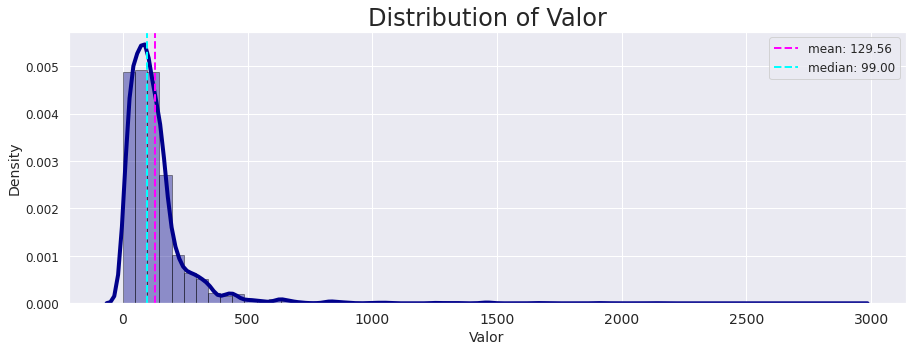

In [120]:
fig = plt.figure(figsize=(15,5))

ax = sns.distplot(
    df.Valor, hist=True, kde=True, 
    bins=int(180/3), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4}
)

ax.axvline(
    df.Valor.mean(), 
    color='magenta', 
    linestyle='dashed', 
    linewidth=2, 
    label="mean: {0:.2f}".format(df.Valor.mean())
)

ax.axvline(
    df.Valor.median(), 
    color='cyan', 
    linestyle='dashed', 
    linewidth=2,
    label="median: {0:.2f}".format(df.Valor.median())
)

plt.title("Distribution of Valor")
plt.legend(loc='upper right')

del ax

### Resource: pure_time